Md.Arifuzzaman Nayeem 

Std_ID: 04192312

HW1_CE6013

Date Set Ref : Air Quality Data - Earlwood, NSW Jan 2017 - Jan 2018, various pollutants and environmental variables by Abi P from Kaggle (https://www.kaggle.com/prakaa/air-quality-data-earlwood-nsw-australia)


In [2]:
import pandas as pd

# Import Data Set

In [3]:
df = pd.read_csv('Earlwood_Air_Data_17_18.csv')
df

,Date,Time,EARLWOOD WDR 1h average,EARLWOOD TEMP 1h average,EARLWOOD WSP 1h average [m/s],EARLWOOD NO 1h average [pphm],EARLWOOD NO2 1h average [pphm],EARLWOOD CO 1h average [ppm],EARLWOOD OZONE 1h average [pphm],EARLWOOD OZONE 4h rolling average [pphm],EARLWOOD PM10 1h average [�g/m�],EARLWOOD PM2.5 1h average [�g/m�],EARLWOOD HUMID 1h average [%],EARLWOOD SD1 1h average [�],EARLWOOD CO 8h rolling average [ppm]
0,1/1/2017,1:00,152.3,22.6,0.4,0.0,0.4,NaN,2.0,2.1,23.6,7.0,87.2,49.01,NaN
1,1/1/2017,2:00,134.0,22.6,0.3,NaN,NaN,NaN,NaN,2.2,21.0,6.6,87.2,46.56,NaN
2,1/1/2017,3:00,132.2,22.6,0.3,0.0,0.6,NaN,1.7,2.0,20.0,7.2,87.0,47.40,NaN
3,1/1/2017,4:00,125.8,22.7,0.2,0.0,0.5,NaN,1.7,1.8,21.4,7.1,87.2,53.70,NaN
4,1/1/2017,5:00,107.9,22.8,0.6,0.0,0.3,NaN,2.1,1.8,21.5,4.3,86.8,41.65,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,1/1/2018,20:00,164.8,23.0,0.9,0.0,0.2,NaN,2.9,2.8,23.7,8.5,78.6,48.50,NaN
8780,1/1/2018,21:00,181.5,22.8,1.0,0.0,0.1,NaN,2.9,2.9,18.6,10.8,78.1,44.08,NaN
8781,1/1/2018,22:00,197.8,22.9,1.1,0.0,0.1,NaN,3.0,2.9,14.4,8.2,76.0,38.30,NaN
8782,1/1/2018,23:00,201.4,22.6,1.1,0.0,0.1,NaN,3.0,3.0,13.5,5.5,75.3,37.33,NaN


# Working Data Set

In [69]:
Working_df = df[['Date','Time','EARLWOOD TEMP 1h average ']]
Working_df.head(5)

,Date,Time,EARLWOOD TEMP 1h average
0,1/1/2017,1:00,22.6
1,1/1/2017,2:00,22.6
2,1/1/2017,3:00,22.6
3,1/1/2017,4:00,22.7
4,1/1/2017,5:00,22.8


# Data Cleaning 

In [5]:
Working_df.isnull().sum()

Date                          0
Time                          0
EARLWOOD TEMP 1h average     23
dtype: int64

In [6]:
Working_df1 = Working_df.dropna()
Working_df1.isnull().sum()

Date                         0
Time                         0
EARLWOOD TEMP 1h average     0
dtype: int64

In [7]:
#Working_df1.Date.unique()
#Working_df1.Time.unique()
#Working_df1['EARLWOOD TEMP 1h average '].unique()

In [68]:
Working_df1['Time'] = Working_df1.Time.replace('24:00:00','24:00')
Working_df1.head(5)

<ipython-input-68-fdf694dbd719>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Working_df1['Time'] = Working_df1.Time.replace('24:00:00','24:00')


,Date,Time,EARLWOOD TEMP 1h average,Working Time
0,1/1/2017,1:00,22.6,0.0
1,1/1/2017,2:00,22.6,1.0
2,1/1/2017,3:00,22.6,2.0
3,1/1/2017,4:00,22.7,3.0
4,1/1/2017,5:00,22.8,4.0


In [9]:
def date_time(date,time): 
    dt  = date.split('/')
    ti = time.split(":")
    return int(dt[2])*365*24+int(dt[1])*30*24+int(dt[0])*24+int(ti[0])+int(ti[1])/60


In [70]:
Real_time = []
for row in Working_df1.index: 
    a = date_time(Working_df1['Date'][row],Working_df1['Time'][row])-date_time(Working_df1['Date'][0],Working_df1['Time'][0])
    Real_time.append(a)


In [71]:
Working_df1['Working Time'] = Real_time
Working_df1.head(5)

<ipython-input-71-25e19eb85b02>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Working_df1['Working Time'] = Real_time


,Date,Time,EARLWOOD TEMP 1h average,Working Time
0,1/1/2017,1:00,22.6,0.0
1,1/1/2017,2:00,22.6,1.0
2,1/1/2017,3:00,22.6,2.0
3,1/1/2017,4:00,22.7,3.0
4,1/1/2017,5:00,22.8,4.0


In [12]:
Working_df2 = Working_df1[['Working Time','EARLWOOD TEMP 1h average ']]

# Final Data Set

In [13]:
Working_df2

,Working Time,EARLWOOD TEMP 1h average
0,0.0,22.6
1,1.0,22.6
2,2.0,22.6
3,3.0,22.7
4,4.0,22.8
...,...,...
8779,8779.0,23.0
8780,8780.0,22.8
8781,8781.0,22.9
8782,8782.0,22.6


# summary statistics of the dataset including mean, median, variance, standard deviation, quartiles (q1, q2, q3), IQR, minimum, maximum, range

In [14]:
stat_Df = Working_df2.describe()
stat_Df

,Working Time,EARLWOOD TEMP 1h average
count,8761.000000,8761.000000
mean,4349.861888,18.218411
std,2499.972401,5.891884
min,0.000000,2.600000
25%,2190.000000,14.100000
50%,4361.000000,18.600000
75%,6510.000000,22.300000
max,8783.000000,43.900000


In [15]:
med = Working_df2.median()
med

Working Time                 4361.0
EARLWOOD TEMP 1h average       18.6
dtype: float64

In [16]:
Var = Working_df2.var()

In [17]:
IQR= stat_Df.loc['75%']-stat_Df.loc['25%']
IQR

Working Time                 4320.0
EARLWOOD TEMP 1h average        8.2
dtype: float64

In [18]:
Range = stat_Df.loc['max']-stat_Df.loc['min']
Range

Working Time                 8783.0
EARLWOOD TEMP 1h average       41.3
dtype: float64

In [19]:
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
plt.rcParams['figure.figsize'] = (20,6)

# Scatter plot

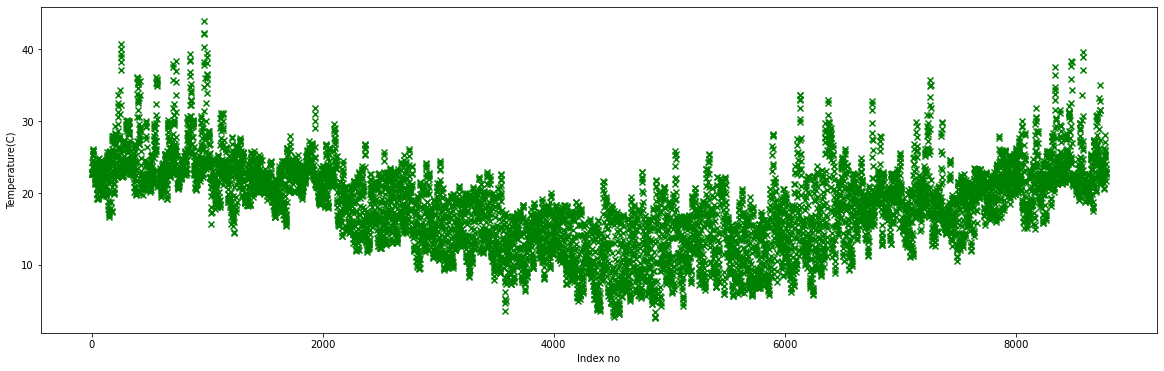

In [20]:
plt.scatter(Working_df2.index,Working_df2['EARLWOOD TEMP 1h average '], color= 'Green',marker='x')
plt.xlabel('Index no')
plt.ylabel('Temperature(C)')
plt.savefig('Scattered.png')

# Box and Whisker plot

C:\Users\Arif -PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


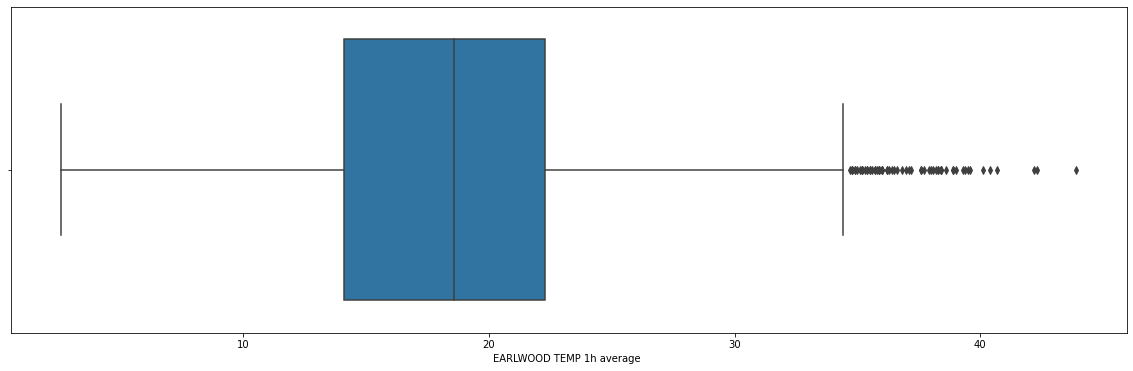

In [21]:
import seaborn as sns
sns.boxplot(Working_df2['EARLWOOD TEMP 1h average '])
plt.savefig('Box_plt.png')

# Time-sequence or time-series plot

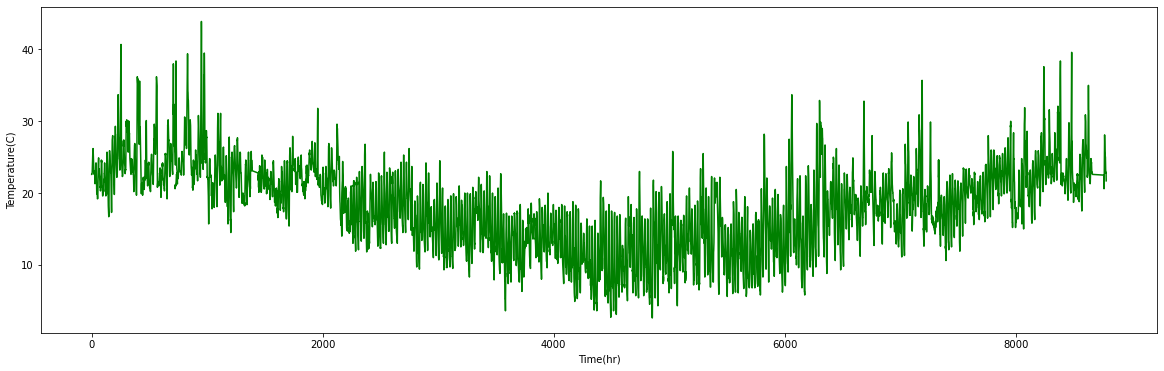

In [22]:
plt.plot(Working_df2['Working Time'],Working_df2['EARLWOOD TEMP 1h average '], color= 'Green')
plt.xlabel('Time(hr)')
plt.ylabel('Temperature(C)')
plt.savefig('Time seried.png')

# Frequency of observations

In [23]:
freq_df = pd.crosstab(index=Working_df2['EARLWOOD TEMP 1h average '], columns= 'counts') 
freq_df

col_0,counts
EARLWOOD TEMP 1h average,
2.6,1
2.7,3
3.0,1
3.1,2
3.4,2
...,...
40.4,1
40.7,1
42.2,1


# Histogram

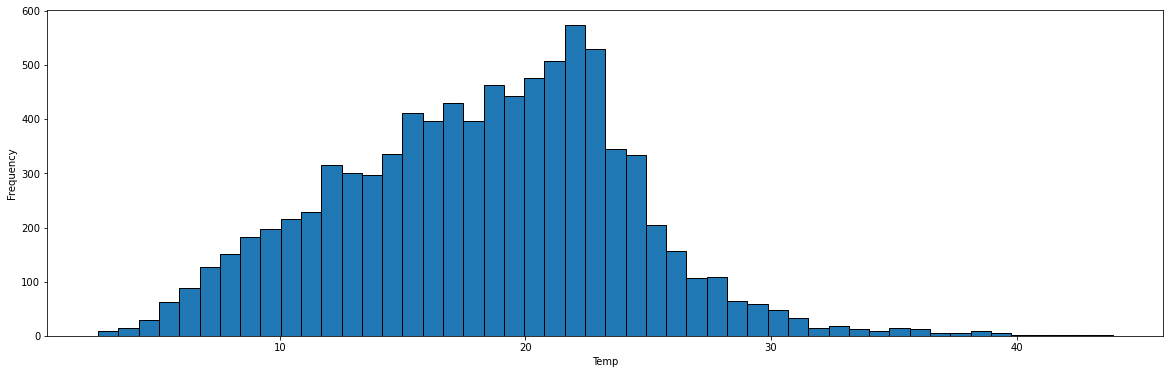

In [75]:
import numpy as np
Working_df2['EARLWOOD TEMP 1h average '].hist(bins = 50,edgecolor = 'Black')
plt.xlabel('Temp')
plt.ylabel('Frequency')
plt.grid(False)


# Cumulative Frequency 

Text(0, 0.5, 'Cum. Frequency')

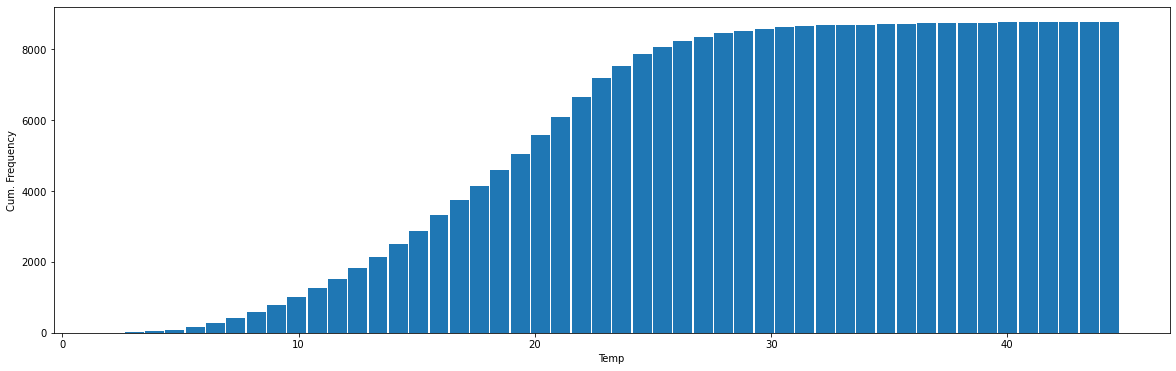

In [73]:

from scipy import stats
import numpy as np
   
res = stats.cumfreq(Working_df2['EARLWOOD TEMP 1h average '], numbins=50)
x = res.lowerlimit + np.linspace(0, res.binsize*res.cumcount.size, res.cumcount.size)
y = res.cumcount
plt.bar(x,y)
plt.xlabel('Temp')
plt.ylabel('Cum. Frequency')